# Problem 1

### Importing Library

In [1]:
library(faraway)

### Getting dataset and it's length

In [2]:
data('teengamb')
nrow(teengamb)

[1] 47

In [3]:
head(teengamb)

sex,status,income,verbal,gamble
1,51,2.00,8,0.0
1,28,2.50,8,0.0
1,37,2.00,6,0.0
1,28,7.00,4,7.3
1,65,2.00,8,19.6
1,61,3.47,6,0.1


### Getting summary of the dataset

In [4]:
summary(teengamb)

      sex             status          income           verbal     
 Min.   :0.0000   Min.   :18.00   Min.   : 0.600   Min.   : 1.00  
 1st Qu.:0.0000   1st Qu.:28.00   1st Qu.: 2.000   1st Qu.: 6.00  
 Median :0.0000   Median :43.00   Median : 3.250   Median : 7.00  
 Mean   :0.4043   Mean   :45.23   Mean   : 4.642   Mean   : 6.66  
 3rd Qu.:1.0000   3rd Qu.:61.50   3rd Qu.: 6.210   3rd Qu.: 8.00  
 Max.   :1.0000   Max.   :75.00   Max.   :15.000   Max.   :10.00  
     gamble     
 Min.   :  0.0  
 1st Qu.:  1.1  
 Median :  6.0  
 Mean   : 19.3  
 3rd Qu.: 19.4  
 Max.   :156.0  

### Converting the sex column to factor type and labeling them 0 as 'male' & 1 as 'female'.

In [5]:
teengamb$sex<-factor(teengamb$sex)
levels(teengamb$sex)<-c('male','female')
summary(teengamb)

     sex         status          income           verbal          gamble     
 male  :28   Min.   :18.00   Min.   : 0.600   Min.   : 1.00   Min.   :  0.0  
 female:19   1st Qu.:28.00   1st Qu.: 2.000   1st Qu.: 6.00   1st Qu.:  1.1  
             Median :43.00   Median : 3.250   Median : 7.00   Median :  6.0  
             Mean   :45.23   Mean   : 4.642   Mean   : 6.66   Mean   : 19.3  
             3rd Qu.:61.50   3rd Qu.: 6.210   3rd Qu.: 8.00   3rd Qu.: 19.4  
             Max.   :75.00   Max.   :15.000   Max.   :10.00   Max.   :156.0  

### Histogram of gamble column of the dataset

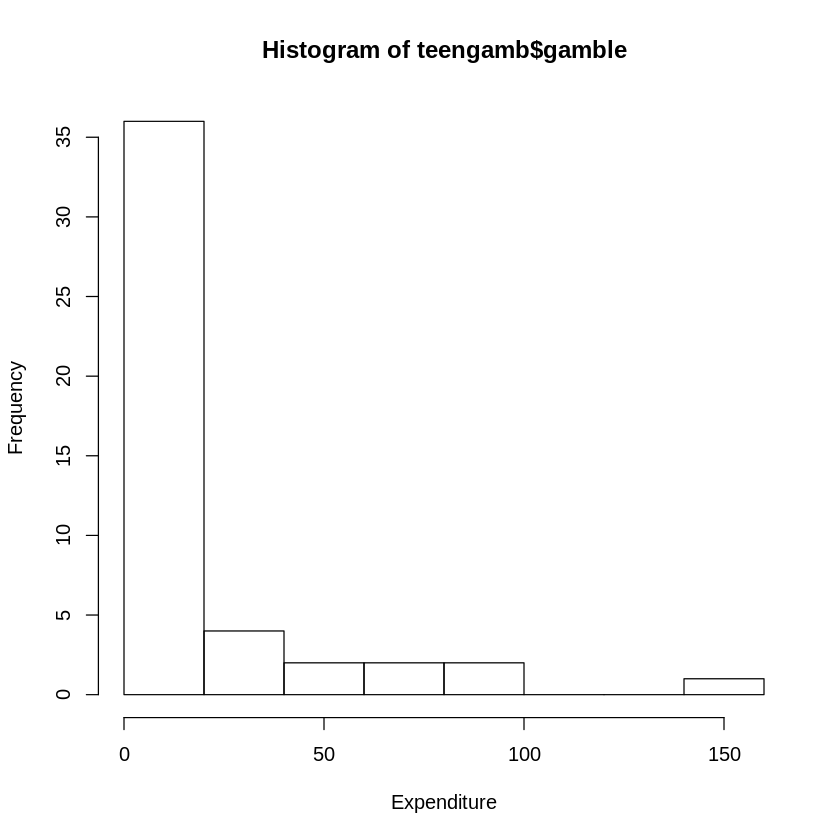

In [6]:
hist(teengamb$gamble,xlab='Expenditure')

### Plotting the density of all the columns

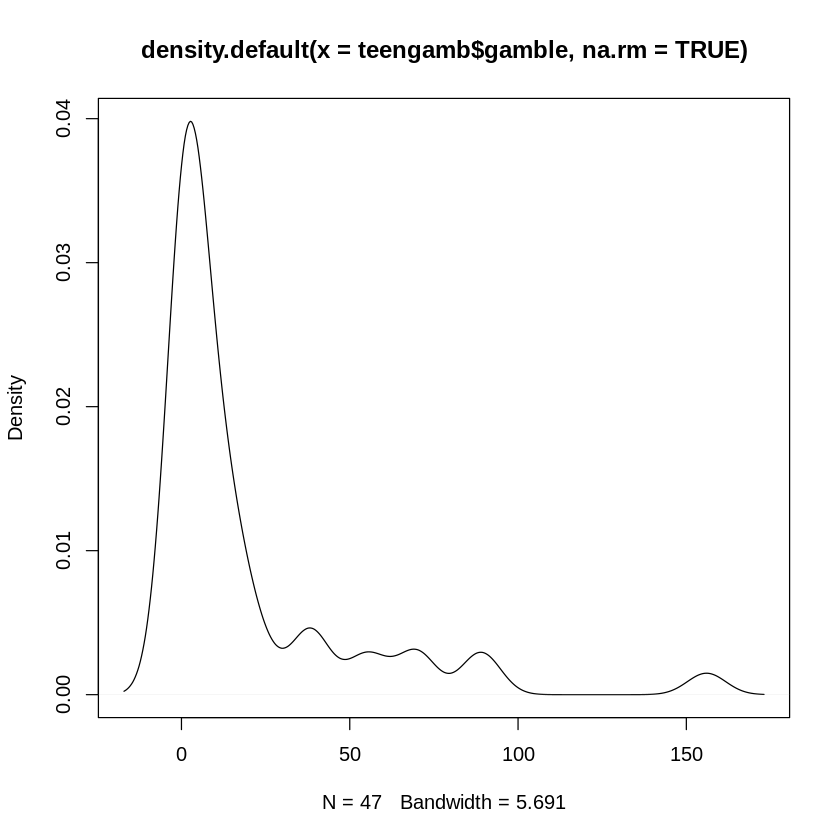

In [7]:
plot(density(teengamb$gamble,na.rm=TRUE))

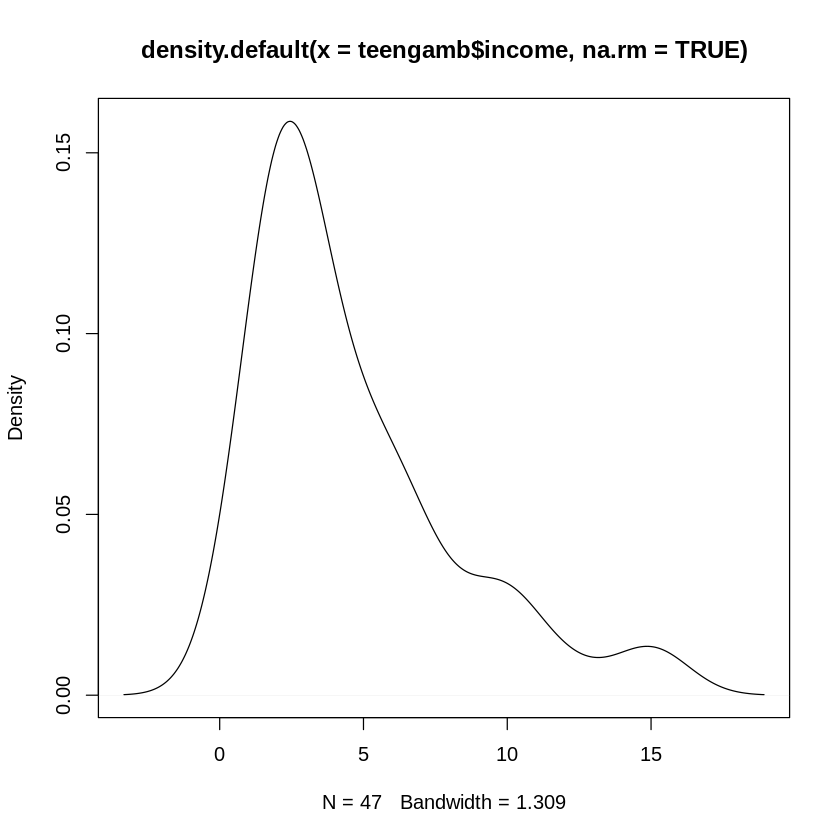

In [8]:
plot(density(teengamb$income,na.rm=TRUE))

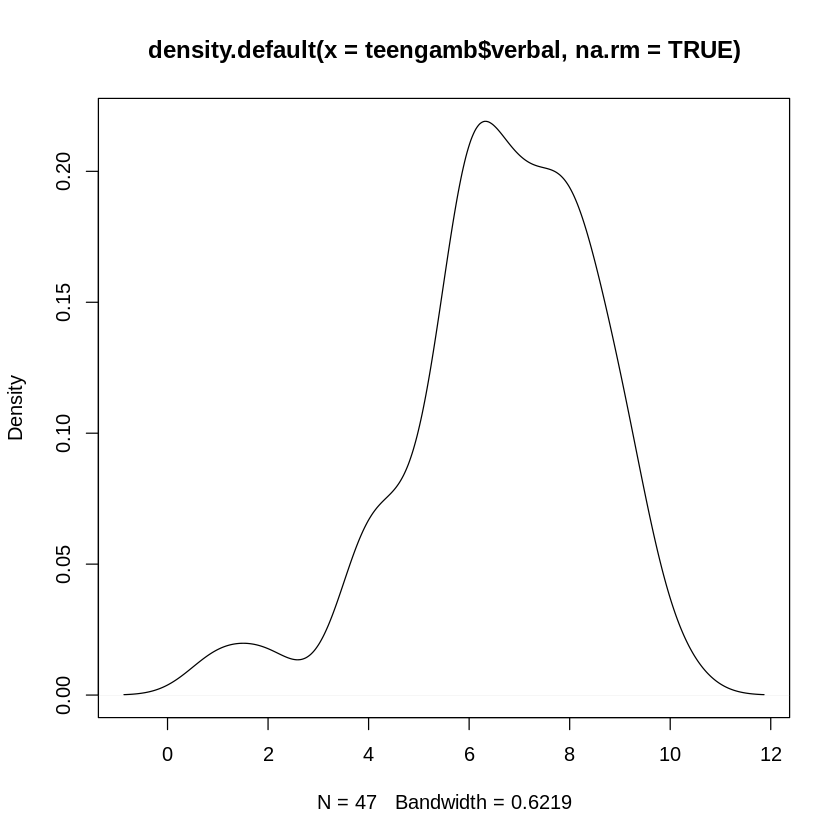

In [9]:
plot(density(teengamb$verbal,na.rm=TRUE))

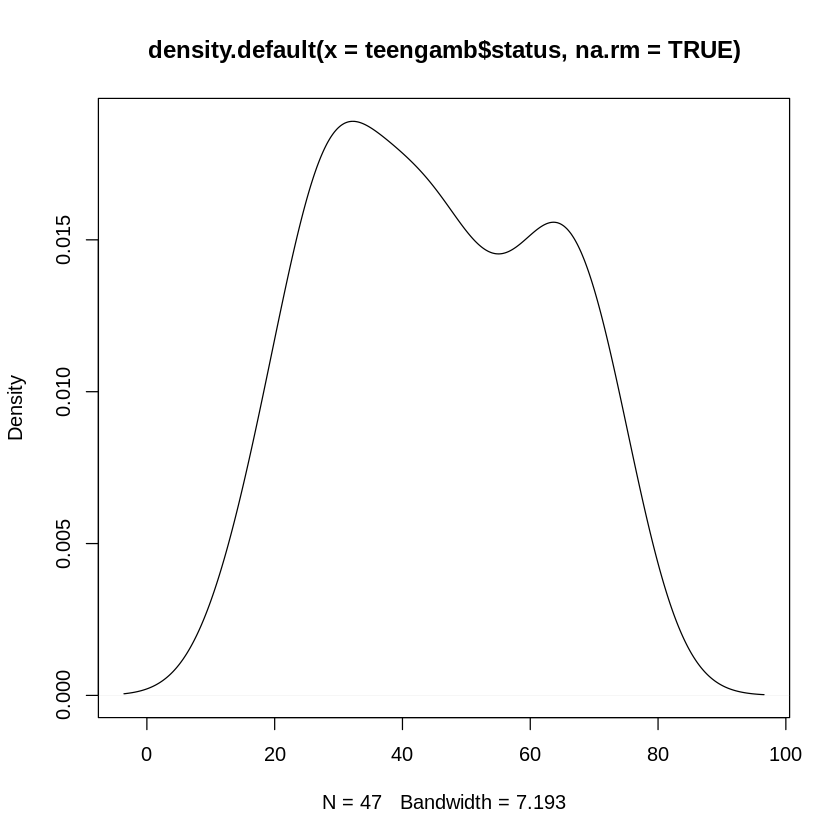

In [10]:
plot(density(teengamb$status,na.rm=TRUE))

### We can see that income and gamble columns are positively skewed (i.e. right skewed)
### We can see from the above plots that only one value is there after 100 and confirm that by sorting the gamble column

In [11]:
sort(teengamb$gamble)

[1]   0.00   0.00   0.00   0.00   0.10   0.10   0.10   0.10   0.10   0.60
[11]   0.60   1.00   1.20   1.20   1.45   1.70   2.10   2.40   3.00   3.00
[21]   3.40   3.60   5.40   6.00   6.60   6.90   7.30   8.40   9.60  12.00
[31]  13.30  14.10  14.40  14.50  19.20  19.60  25.00  38.00  38.50  38.50
[41]  53.20  57.20  69.70  70.00  88.00  90.00 156.00

### We remove the outlier value of 156 in the gamble column and plot it's density
### We can see that the gamble column is still positively skewed (i.e. right skewed)

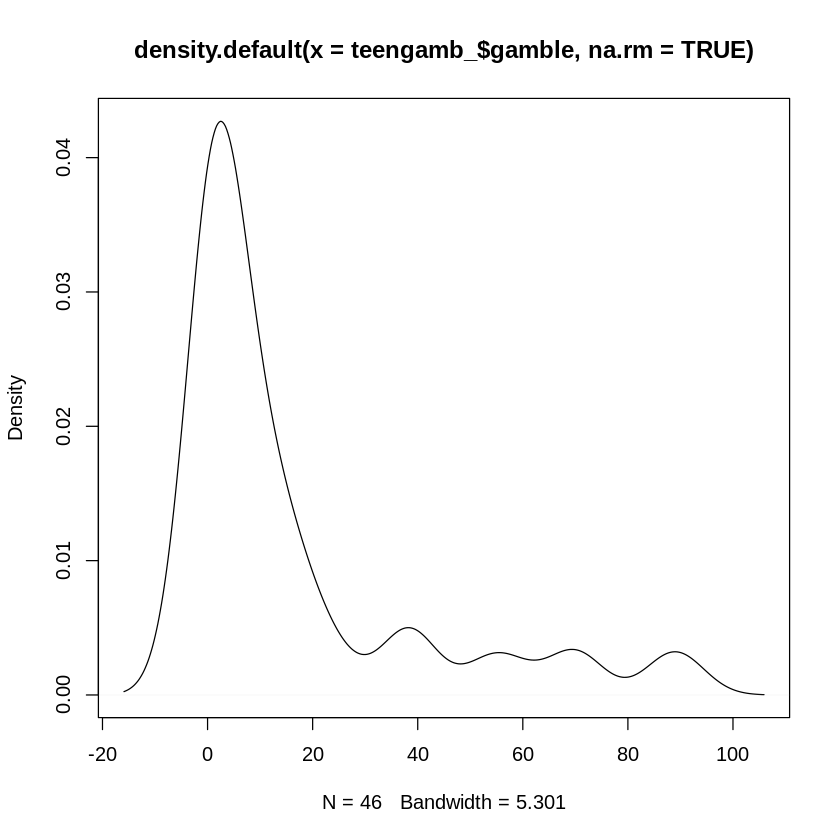

In [12]:
teengamb_<-teengamb[teengamb$gamble<156,]
plot(density(teengamb_$gamble,na.rm=TRUE))

### We compare the gamble column with other columns of the dataset by using the pairs function
### We can also see that only the income column has any sort of linear relation with the gamble column

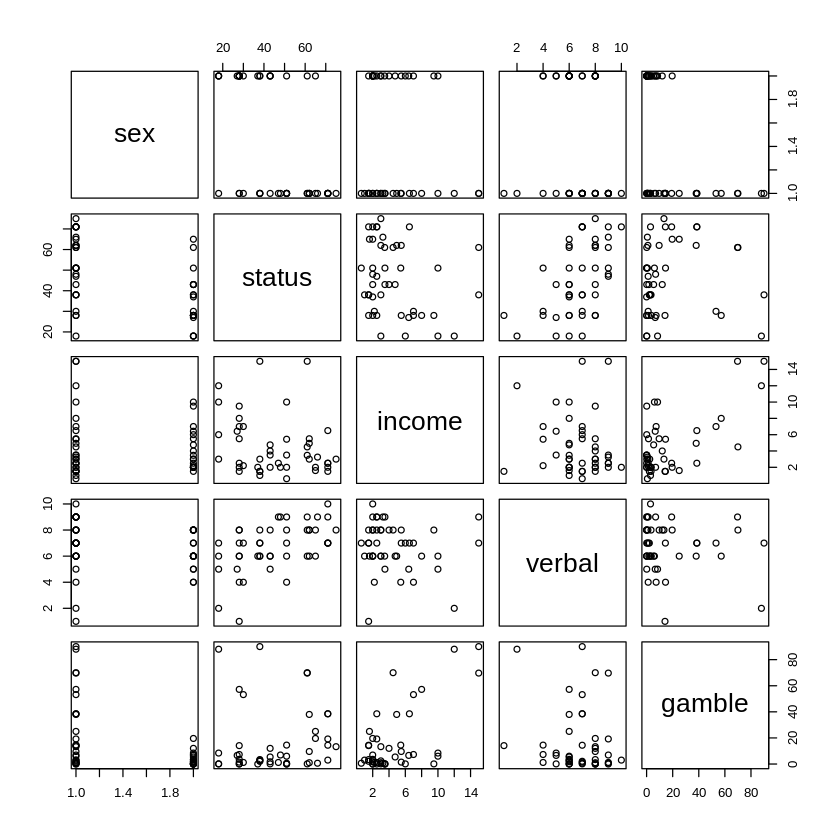

In [13]:
pairs(teengamb_)

### We can see that men generally gamble more by looking at the boxplot

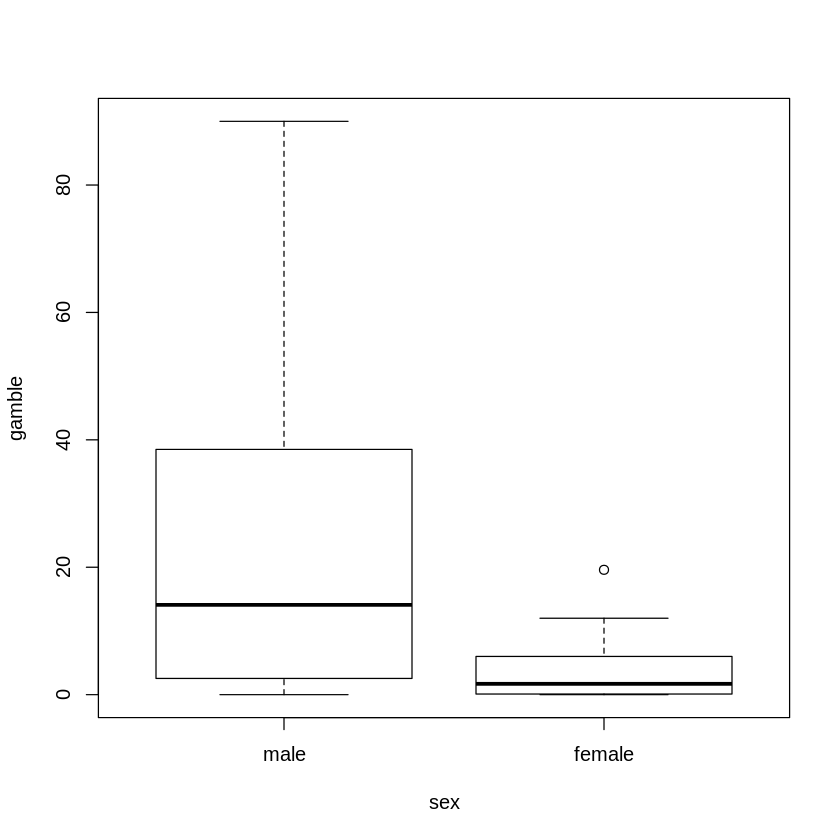

In [14]:
plot(gamble~sex,teengamb_)

### We can see that the line plotted by the coefficients of the linear model (b/w income & gamble) is not precise as many points lie far away from the line

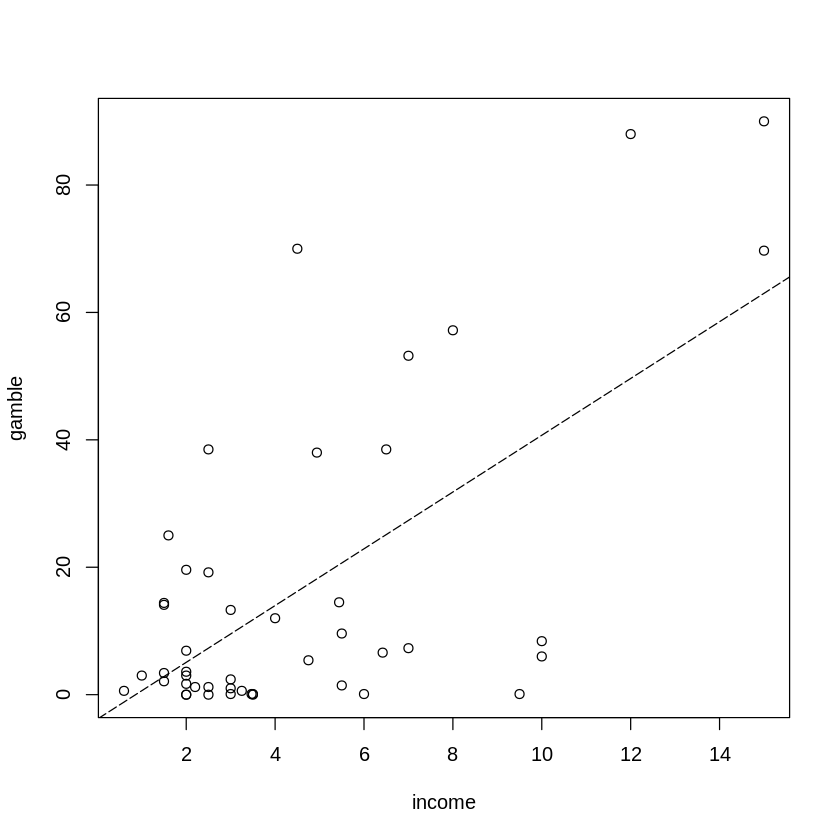

In [15]:
plot(gamble~income,teengamb_)
model<-lm(gamble~income,teengamb_)
abline(coef(model),lty=5)

### We try to normalize the income column by using log transformation

In [16]:
teengamb_log<-data.table::copy(teengamb)
#Setting values of less than 1 to 1 to avoid negative values
teengamb_log[teengamb_log$gamble<1,]$gamble<-1

teengamb_log_<-data.table::copy(teengamb_)
#Setting values of less than 1 to 1 to avoid negative values
teengamb_log_[teengamb_log_$gamble<1,]$gamble<-1

In [17]:
teengamb_log$gamble<-log(teengamb_log$gamble)
teengamb_log_$gamble<-log(teengamb_log_$gamble)
summary(teengamb_log)

     sex         status          income           verbal          gamble       
 male  :28   Min.   :18.00   Min.   : 0.600   Min.   : 1.00   Min.   :0.00000  
 female:19   1st Qu.:28.00   1st Qu.: 2.000   1st Qu.: 6.00   1st Qu.:0.09116  
             Median :43.00   Median : 3.250   Median : 7.00   Median :1.79176  
             Mean   :45.23   Mean   : 4.642   Mean   : 6.66   Mean   :1.80744  
             3rd Qu.:61.50   3rd Qu.: 6.210   3rd Qu.: 8.00   3rd Qu.:2.96522  
             Max.   :75.00   Max.   :15.000   Max.   :10.00   Max.   :5.04986  

### Density of the gamble column after log transformation

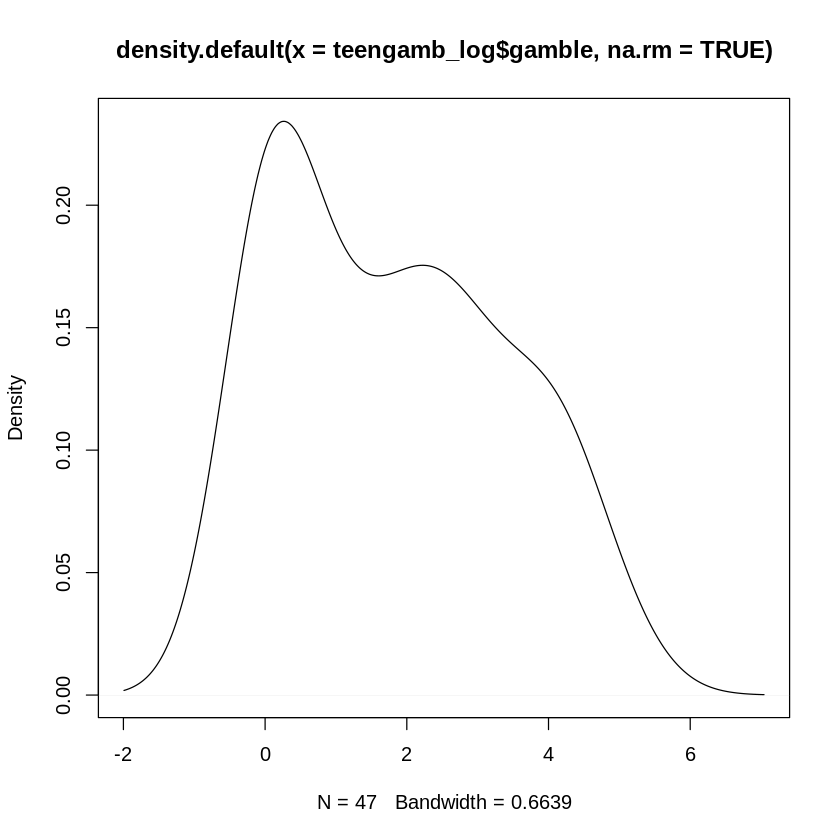

In [18]:
plot(density(teengamb_log$gamble,na.rm=TRUE))

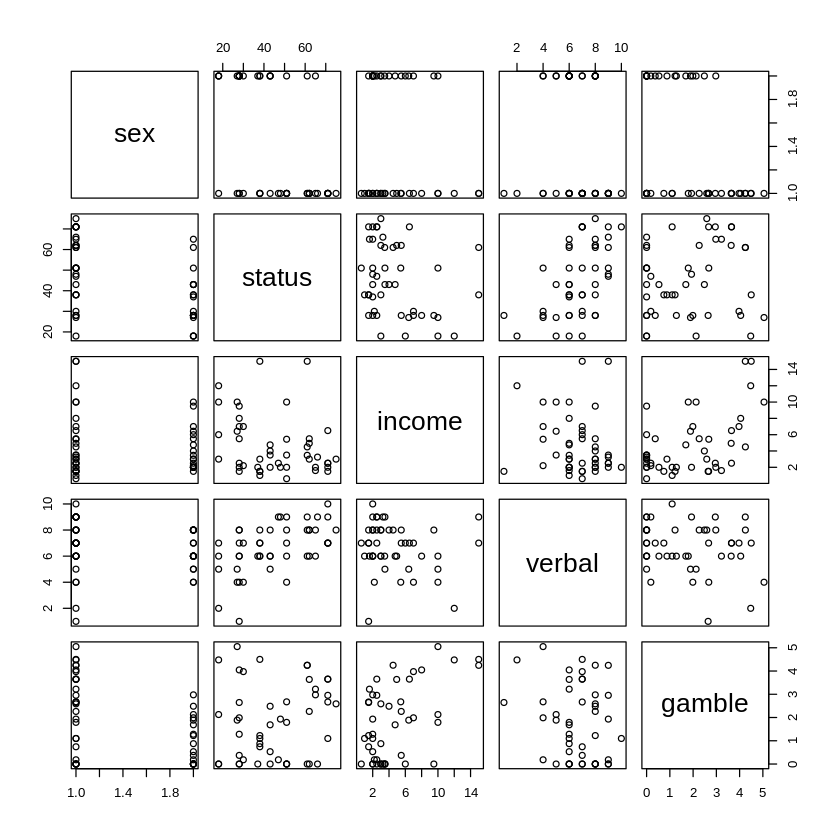

In [19]:
pairs(teengamb_log)

### We can see that normalization doesn't help that much 

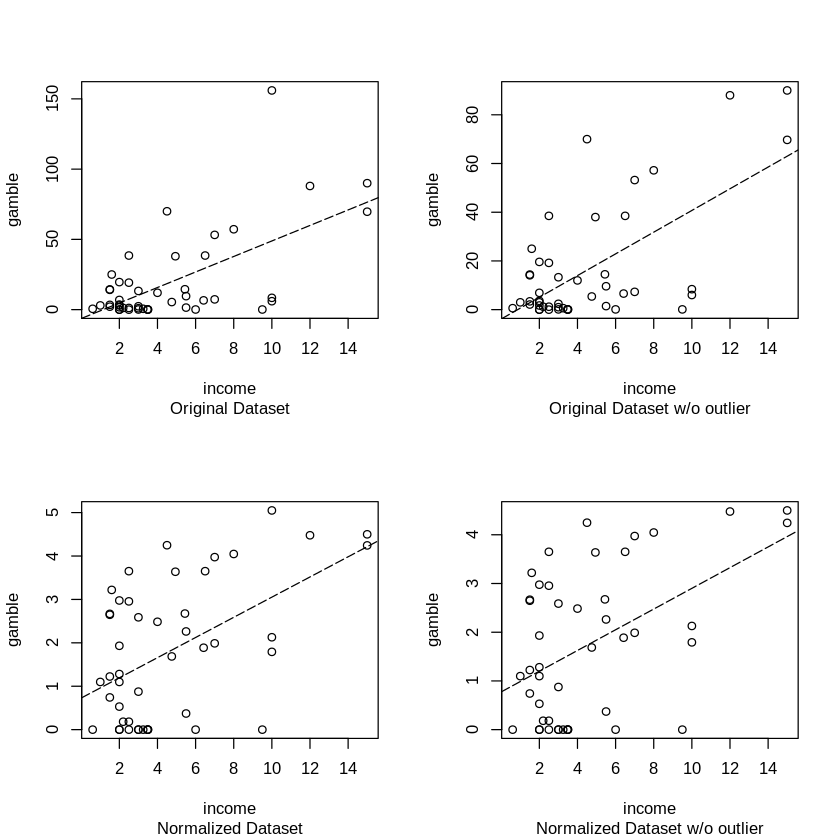

In [20]:
par(mfrow=c(2,2))
plot(gamble~income,teengamb, sub='Original Dataset')
model<-lm(gamble~income,teengamb)
abline(coef(model),lty=5)

plot(gamble~income,teengamb_, sub='Original Dataset w/o outlier')
model<-lm(gamble~income,teengamb_)
abline(coef(model),lty=5)

plot(gamble~income,teengamb_log, sub='Normalized Dataset')
model<-lm(gamble~income,teengamb_log)
abline(coef(model),lty=5)

plot(gamble~income,teengamb_log_,  sub='Normalized Dataset w/o outlier')
model<-lm(gamble~income,teengamb_log_)
abline(coef(model),lty=5)


# Conclusion:
    # i) Males generally spend more than females on gambling
    # ii) Income is positily skewed between the sample population which is to be expected
    # iii) No linear correlation found in the dataset

# Problem 2

### Getting dataset and it's length

In [21]:
data(prostate)
nrow(prostate)

[1] 97

### Getting summary of the dataset

In [22]:
summary(prostate)

     lcavol           lweight           age             lbph        
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001  
 Mean   : 1.3500   Mean   :3.653   Mean   :63.87   Mean   : 0.1004  
 3rd Qu.: 2.1270   3rd Qu.:3.878   3rd Qu.:68.00   3rd Qu.: 1.5581  
 Max.   : 3.8210   Max.   :6.108   Max.   :79.00   Max.   : 2.3263  
      svi              lcp             gleason          pgg45       
 Min.   :0.0000   Min.   :-1.3863   Min.   :6.000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000   1st Qu.:  0.00  
 Median :0.0000   Median :-0.7985   Median :7.000   Median : 15.00  
 Mean   :0.2165   Mean   :-0.1794   Mean   :6.753   Mean   : 24.38  
 3rd Qu.:0.0000   3rd Qu.: 1.1786   3rd Qu.:7.000   3rd Qu.: 40.00  
 Max.   :1.0000   Max.   : 2.9042   Max.   :9.000   Max.   :100.00  
      lpsa        
 Min.   :-0.430

### Converting svi and gleason to factors

In [23]:
unique(prostate$svi)
unique(prostate$gleason)

[1] 0 1

[1] 6 7 8 9

In [24]:
prostate$gleason <- factor(prostate$gleason)
prostate$svi <- factor(prostate$svi)
summary(prostate)

     lcavol           lweight           age             lbph         svi   
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863   0:76  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863   1:21  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001         
 Mean   : 1.3500   Mean   :3.653   Mean   :63.87   Mean   : 0.1004         
 3rd Qu.: 2.1270   3rd Qu.:3.878   3rd Qu.:68.00   3rd Qu.: 1.5581         
 Max.   : 3.8210   Max.   :6.108   Max.   :79.00   Max.   : 2.3263         
      lcp          gleason     pgg45             lpsa        
 Min.   :-1.3863   6:35    Min.   :  0.00   Min.   :-0.4308  
 1st Qu.:-1.3863   7:56    1st Qu.:  0.00   1st Qu.: 1.7317  
 Median :-0.7985   8: 1    Median : 15.00   Median : 2.5915  
 Mean   :-0.1794   9: 5    Mean   : 24.38   Mean   : 2.4784  
 3rd Qu.: 1.1786           3rd Qu.: 40.00   3rd Qu.: 3.0564  
 Max.   : 2.9042           Max.   :100.00   Max.   : 5.5829  

### Plotting density of log(prostate specific antigen) - lpsa

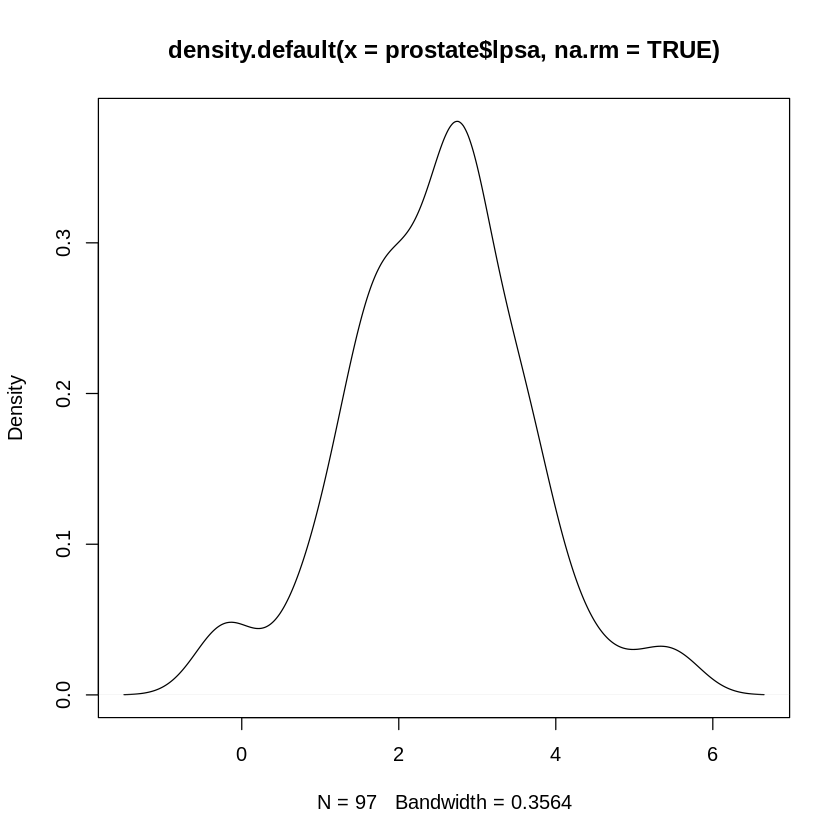

In [25]:
plot(density(prostate$lpsa, na.rm = TRUE))

### Histogram of log(prostate specific antigen) - lpsa

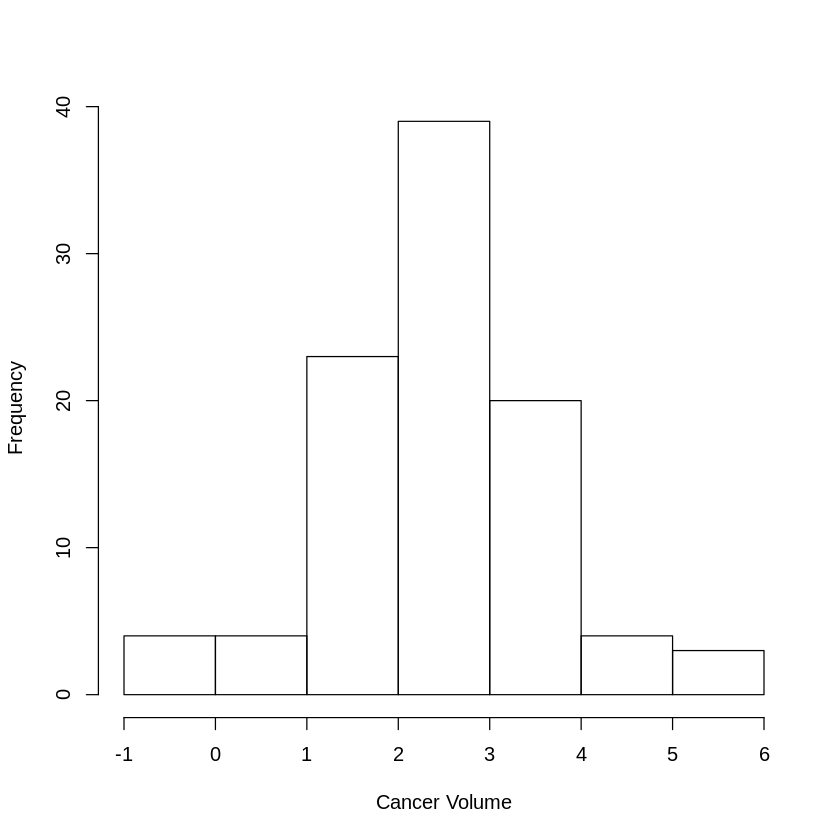

In [26]:
hist(prostate$lpsa, xlab = "Cancer Volume", main = "")

### Comparing the lpsa column with other columns of the dataset by using the pairs function
### We can see that lcavol column is the most linearly similar column to lpsa
### We can also see that lcp is similar to lpsa barring some outliers

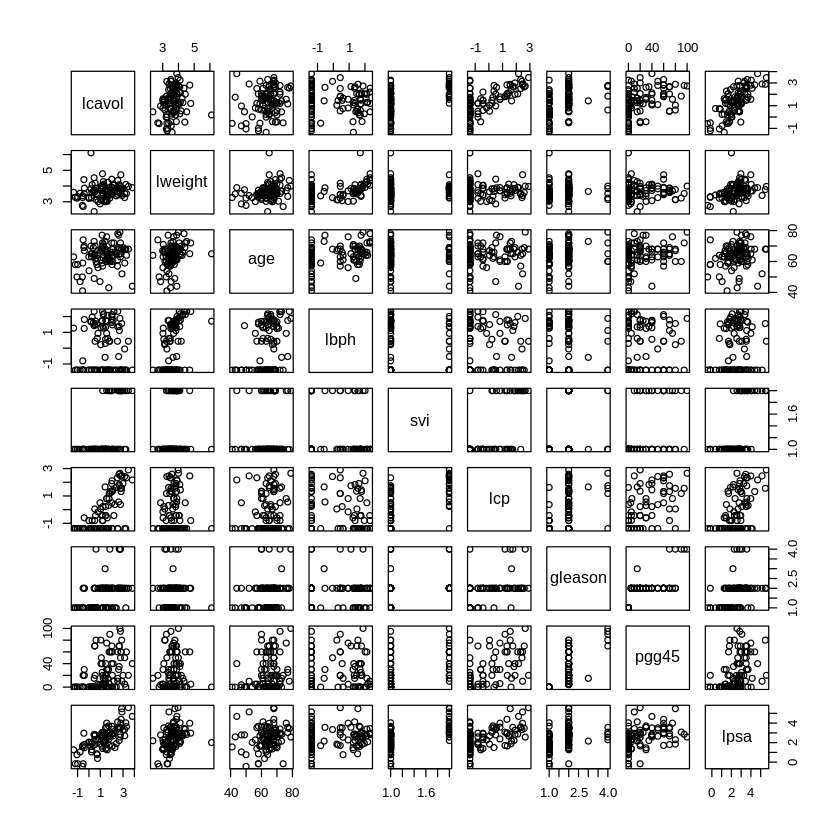

In [27]:
pairs(prostate)

### We can see that line plotted by the coefficients of the linear model(b/w lpsa & lcavol) is not that precise but still many points are near the line

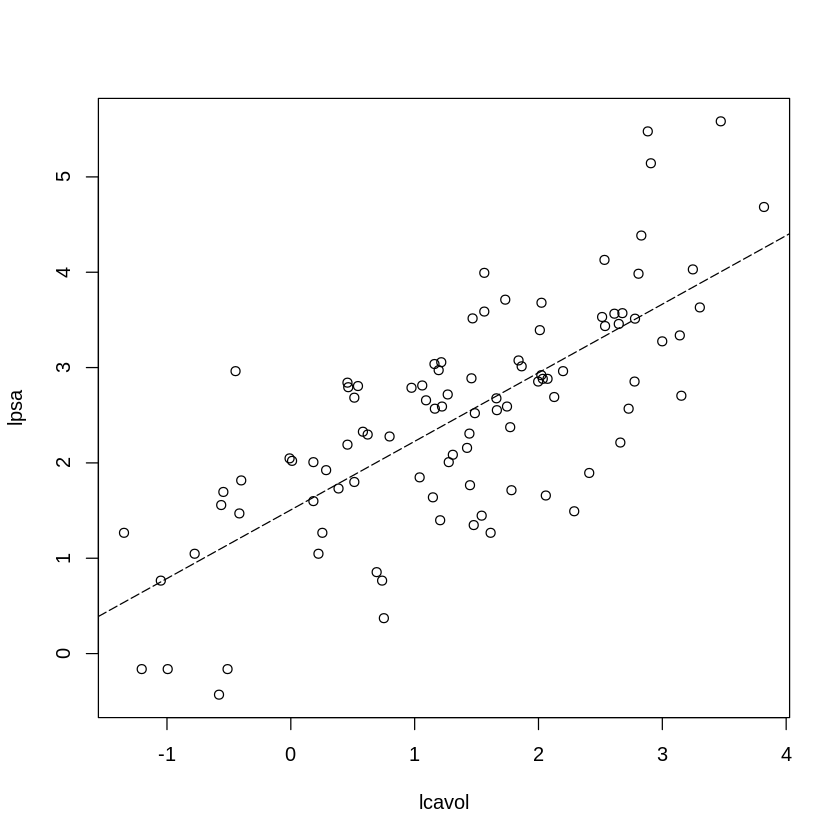

In [28]:
plot(lpsa~lcavol,prostate)
model<-lm(lpsa~lcavol,prostate)
abline(coef(model),lty=5)

### We can see that lcp has some values which don't correlate with lpsa 

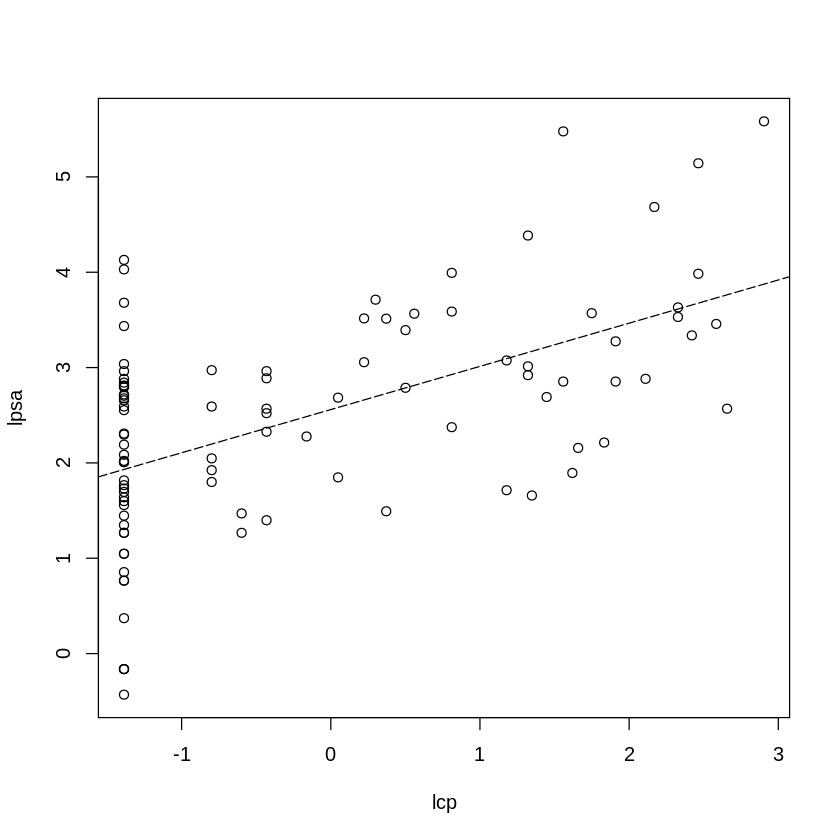

In [29]:
plot(lpsa~lcp,prostate)
model<-lm(lpsa~lcp,prostate)
abline(coef(model),lty=5)

In [30]:
summary(prostate$lcp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.3863 -1.3863 -0.7985 -0.1794  1.1786  2.9042 

### We find that the mode of the lcp column doesn't correlate with lpsa and remove it

In [31]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
getmode(prostate$lcp)

[1] -1.38629

In [32]:
prostate_<-prostate[prostate$lcp>-1.38,]

### Plotting line given by the coefficients of the linear model(b/w lpsa & lcp without mode)

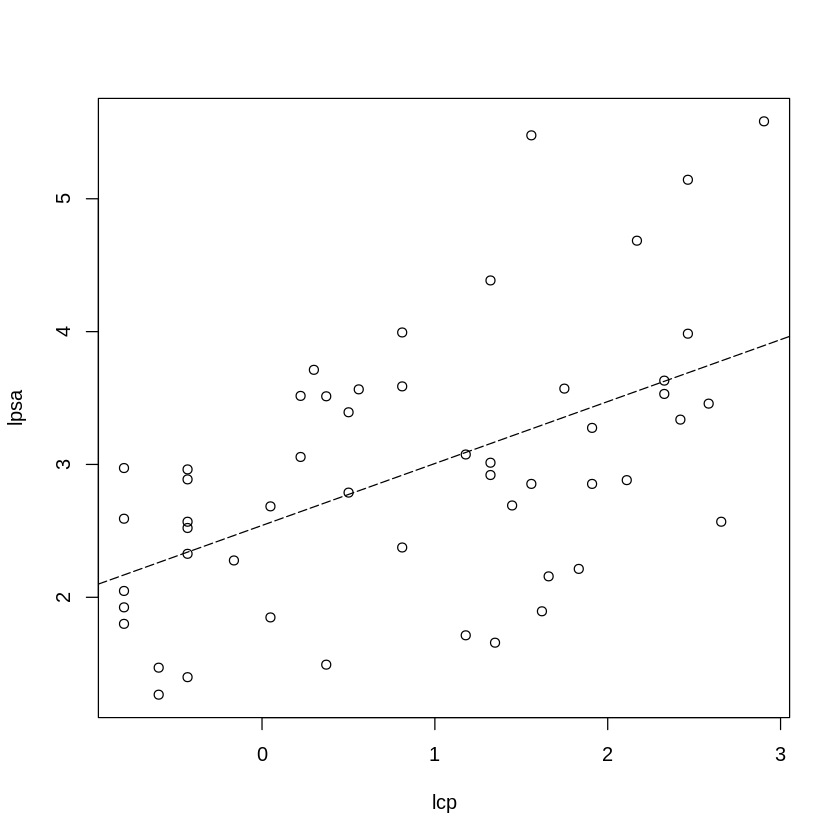

In [33]:
plot(lpsa~lcp,prostate_)
model<-lm(lpsa~lcp,prostate_)
abline(coef(model),lty=5)

# Conclusion:
    # i) Log (Cancer Volume) is most linearly similar to lpsa

In [34]:
nbconvert homework1.ipynb --to pdf

ERROR: Error in parse(text = x, srcfile = src): <text>:1:9: unexpected symbol
1: jupyter nbconvert
            ^
